Importing the libraries I expect to use during this assignment.

In [60]:
# Importing some libraries beforehand
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

Load and show the data:

In [61]:
# Import the dataset(ds)
ds = pd.read_csv('1655023Pet shop.csv')
ds.head()

,Unnamed: 0,products_sold,product_category,quality,satisfaction,discount,retail_price,perc_physical,market_size
0,1,67648,health,off_brand,3.5,12,33.0,42.3,852
1,2,120421,other,off_brand,4.5,10,16.0,54.3,1045
2,3,95242,toys,off_brand,2.9,6,25.0,88.2,1461
3,4,105632,health,off_brand,2.6,8,NaN,5.0,1579
4,5,221627,toys,off_brand,4.9,11,25.0,57.0,2643


Assignment 1: (15%)

First, turn the categorical variables into dummy variables and explain which category you chose as the reference category. Second, run a regression model where all independent variables are included in a single model. Use Cook’s D to find out if there are any outliers. Note: you will first have to remove missing values first in order to get Cooks D to work.

After you identified the relevant outliers, go back to the original data and turn these outliers into missing values.

First, turn the categorical variables into dummy variables

In [62]:
# First, turn the categorical variables into dummy variables
product_category_dummies = pd.get_dummies(ds['product_category'])
product_quality_dummies = pd.get_dummies(ds['quality'])
ds_dummies = pd.concat([ds,product_category_dummies,product_quality_dummies], axis=1)
ds_dummies.head()

,Unnamed: 0,products_sold,product_category,quality,satisfaction,discount,retail_price,perc_physical,market_size,food,health,other,toys,off_brand,premium
0,1,67648,health,off_brand,3.5,12,33.0,42.3,852,False,True,False,False,True,False
1,2,120421,other,off_brand,4.5,10,16.0,54.3,1045,False,False,True,False,True,False
2,3,95242,toys,off_brand,2.9,6,25.0,88.2,1461,False,False,False,True,True,False
3,4,105632,health,off_brand,2.6,8,NaN,5.0,1579,False,True,False,False,True,False
4,5,221627,toys,off_brand,4.9,11,25.0,57.0,2643,False,False,False,True,True,False


In [63]:
# Calculate the number of categories in 'product_category'
category_counts = ds['product_category'].value_counts()

category_counts

product_category
health    858
toys      824
other     296
food      272
Name: count, dtype: int64

In [64]:
# Calculate the number of categories in 'product_category'
quality_counts = ds['quality'].value_counts()

quality_counts

quality
off_brand    1263
premium       876
Name: count, dtype: int64

In [65]:
columns_to_drop1 = ['Unnamed: 0', 'other', 'off_brand']
ds_dummies = ds_dummies.drop(columns=columns_to_drop1)
ds_dummies.head()

,products_sold,product_category,quality,satisfaction,discount,retail_price,perc_physical,market_size,food,health,toys,premium
0,67648,health,off_brand,3.5,12,33.0,42.3,852,False,True,False,False
1,120421,other,off_brand,4.5,10,16.0,54.3,1045,False,False,False,False
2,95242,toys,off_brand,2.9,6,25.0,88.2,1461,False,False,True,False
3,105632,health,off_brand,2.6,8,NaN,5.0,1579,False,True,False,False
4,221627,toys,off_brand,4.9,11,25.0,57.0,2643,False,False,True,False


In my analysis, I chose other and off_brand as my reference categories to compare product_category and quality.
I chose other because it's a mixed category and health and toys were almost the same in numbers. This way, I could easily see how the special types health, toys or food did against a mix of everything else.

I went with off_brand as the standard for quality because we had more of these than premium ones. This lets me show if premium really means more sales compared to the usual off-brand products.

In [66]:
# Check for missing values in the dataset
ds_dummies.isnull().sum()

products_sold         0
product_category      0
quality             111
satisfaction          0
discount              0
retail_price        157
perc_physical        64
market_size           0
food                  0
health                0
toys                  0
premium               0
dtype: int64

In [67]:
#dropping the missing values
ds_clean = ds_dummies.dropna()
ds_clean.isnull().sum()

products_sold       0
product_category    0
quality             0
satisfaction        0
discount            0
retail_price        0
perc_physical       0
market_size         0
food                0
health              0
toys                0
premium             0
dtype: int64

In [68]:
ds_clean.head()

,products_sold,product_category,quality,satisfaction,discount,retail_price,perc_physical,market_size,food,health,toys,premium
0,67648,health,off_brand,3.5,12,33.0,42.3,852,False,True,False,False
1,120421,other,off_brand,4.5,10,16.0,54.3,1045,False,False,False,False
2,95242,toys,off_brand,2.9,6,25.0,88.2,1461,False,False,True,False
4,221627,toys,off_brand,4.9,11,25.0,57.0,2643,False,False,True,False
5,55492,other,off_brand,3.6,8,19.0,40.8,915,False,False,False,False


In [69]:
model1 = smf.ols('products_sold ~ health + toys + food + satisfaction + discount + retail_price + perc_physical + market_size + premium', data=ds_clean).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:          products_sold   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     774.5
Date:                Thu, 04 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:48:10   Log-Likelihood:                -22325.
No. Observations:                1942   AIC:                         4.467e+04
Df Residuals:                    1932   BIC:                         4.473e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -1.06e+05   5091.217    -

In [70]:
CooksD = model1.get_influence().cooks_distance
n = len(ds_clean)
ds_clean['outlier'] = CooksD[0] > 4/n
ds_clean.head()

/tmp/ipykernel_1820/229332129.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_clean['outlier'] = CooksD[0] > 4/n


,products_sold,product_category,quality,satisfaction,discount,retail_price,perc_physical,market_size,food,health,toys,premium,outlier
0,67648,health,off_brand,3.5,12,33.0,42.3,852,False,True,False,False,False
1,120421,other,off_brand,4.5,10,16.0,54.3,1045,False,False,False,False,False
2,95242,toys,off_brand,2.9,6,25.0,88.2,1461,False,False,True,False,False
4,221627,toys,off_brand,4.9,11,25.0,57.0,2643,False,False,True,False,False
5,55492,other,off_brand,3.6,8,19.0,40.8,915,False,False,False,False,False


In [71]:
print(ds_clean[ds_clean.outlier == True])

      products_sold product_category    quality  satisfaction  discount  \
25           146040            other  off_brand           4.8       224   
93            38877             food    premium           3.2       193   
104          103302            other    premium           2.4         5   
147          165368           health  off_brand           3.7         2   
199           54201           health    premium           4.4         4   
...             ...              ...        ...           ...       ...   
2116          54890           health  off_brand           2.2         4   
2135         138834            other  off_brand           2.6         9   
2149         178843            other    premium           4.7        25   
2154          74674             food    premium           3.1         2   
2196          95990             toys    premium           2.9        14   

      retail_price  perc_physical  market_size   food  health   toys  premium  \
25            11.0

After looking at these 83 outliers, there are not much that are impossible except for the discount weeks which were above 52 and the perc_phyical percentages which were above 100. These impossible outliers will be removed to a missing value in the original dataset: ds_dummies.

In [72]:
ds_dummies.loc[ds_dummies['discount']>52,'discount'] = np.nan
ds_dummies.loc[ds_dummies['perc_physical']>100,'perc_physical'] = np.nan
ds_dummies.isnull().sum()

products_sold         0
product_category      0
quality             111
satisfaction          0
discount             22
retail_price        157
perc_physical        89
market_size           0
food                  0
health                0
toys                  0
premium               0
dtype: int64

As there can be seen there are some missing values added to discount as well as perc_physical.

Assignment 2: (15%)

The original data contained missing values, and if you did assignment 1 correctly some more should be added. Use the correct imputation techniques for dealing with both the categorical and continuous missing values. Explain what you did. After this, check if there are potential issues with multicollinearity, and if there are, explain how you dealt with it.

In [73]:
ds2 = pd.get_dummies(ds_dummies, dummy_na=True)
ds2.head()

,products_sold,satisfaction,discount,retail_price,perc_physical,market_size,food,health,toys,premium,product_category_food,product_category_health,product_category_other,product_category_toys,product_category_nan,quality_off_brand,quality_premium,quality_nan
0,67648,3.5,12.0,33.0,42.3,852,False,True,False,False,False,True,False,False,False,True,False,False
1,120421,4.5,10.0,16.0,54.3,1045,False,False,False,False,False,False,True,False,False,True,False,False
2,95242,2.9,6.0,25.0,88.2,1461,False,False,True,False,False,False,False,True,False,True,False,False
3,105632,2.6,8.0,NaN,5.0,1579,False,True,False,False,False,True,False,False,False,True,False,False
4,221627,4.9,11.0,25.0,57.0,2643,False,False,True,False,False,False,False,True,False,True,False,False


In this step above I transformed my categorical data by making dummy variables and a seperate column for missing values of the quality and product_category, this shows the NaN values in the product_category and the quality column.

In [74]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputed_data = IterativeImputer().fit_transform(ds2)
imputed_data = pd.DataFrame(imputed_data, columns=ds2.columns)
imputed_data.isnull().sum()

products_sold              0
satisfaction               0
discount                   0
retail_price               0
perc_physical              0
market_size                0
food                       0
health                     0
toys                       0
premium                    0
product_category_food      0
product_category_health    0
product_category_other     0
product_category_toys      0
product_category_nan       0
quality_off_brand          0
quality_premium            0
quality_nan                0
dtype: int64

Next I used Iterative Imputer to guess what the missing data could be for my categorical and continuous data, this is done by making accurate guesses by looking at all the other information in the dataset.
Hereafter it is converted back into a pandas DataFrame with pd.DataFrame, then I checked to make sure there were no missing values left. It shows there are no missing values left.

In [75]:
imputed_data.head()

,products_sold,satisfaction,discount,retail_price,perc_physical,market_size,food,health,toys,premium,product_category_food,product_category_health,product_category_other,product_category_toys,product_category_nan,quality_off_brand,quality_premium,quality_nan
0,67648.0,3.5,12.0,33.000000,42.3,852.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,120421.0,4.5,10.0,16.000000,54.3,1045.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,95242.0,2.9,6.0,25.000000,88.2,1461.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,105632.0,2.6,8.0,18.716905,5.0,1579.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,221627.0,4.9,11.0,25.000000,57.0,2643.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [76]:
columns_to_drop = ['product_category_food', 'product_category_health', 'product_category_toys', 'quality_premium', 'product_category_nan', 'product_category_other', 'quality_off_brand', 'quality_nan']
imputed_data = imputed_data.drop(columns=columns_to_drop)
imputed_data.head()

,products_sold,satisfaction,discount,retail_price,perc_physical,market_size,food,health,toys,premium
0,67648.0,3.5,12.0,33.000000,42.3,852.0,0.0,1.0,0.0,0.0
1,120421.0,4.5,10.0,16.000000,54.3,1045.0,0.0,0.0,0.0,0.0
2,95242.0,2.9,6.0,25.000000,88.2,1461.0,0.0,0.0,1.0,0.0
3,105632.0,2.6,8.0,18.716905,5.0,1579.0,0.0,1.0,0.0,0.0
4,221627.0,4.9,11.0,25.000000,57.0,2643.0,0.0,0.0,1.0,0.0


I deleted every column which was not necessary for my futere analysis, this gives me an clear overview about the data that I am analyzing.

In [77]:
model2 = smf.ols('products_sold ~ health + toys + food + satisfaction + discount + retail_price + perc_physical + market_size + premium', data=imputed_data).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          products_sold   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     1119.
Date:                Thu, 04 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:48:11   Log-Likelihood:                -25648.
No. Observations:                2250   AIC:                         5.132e+04
Df Residuals:                    2240   BIC:                         5.137e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.151e+05   4312.666    -26.695

               products_sold  satisfaction  discount  retail_price  \
products_sold       1.000000      0.476438  0.186068     -0.060652   
satisfaction        0.476438      1.000000  0.015570     -0.014664   
discount            0.186068      0.015570  1.000000      0.008080   
retail_price       -0.060652     -0.014664  0.008080      1.000000   
perc_physical       0.028258      0.029507 -0.004305      0.020359   
market_size         0.708472     -0.003321 -0.032040      0.032251   
food                0.137413      0.011887 -0.000225      0.021903   
health              0.042056      0.032060  0.021261      0.005757   
toys               -0.112881     -0.012920 -0.021165      0.003552   
premium            -0.114744     -0.028253  0.008903     -0.046267   

               perc_physical  market_size      food    health      toys  \
products_sold       0.028258     0.708472  0.137413  0.042056 -0.112881   
satisfaction        0.029507    -0.003321  0.011887  0.032060 -0.012920   
disc

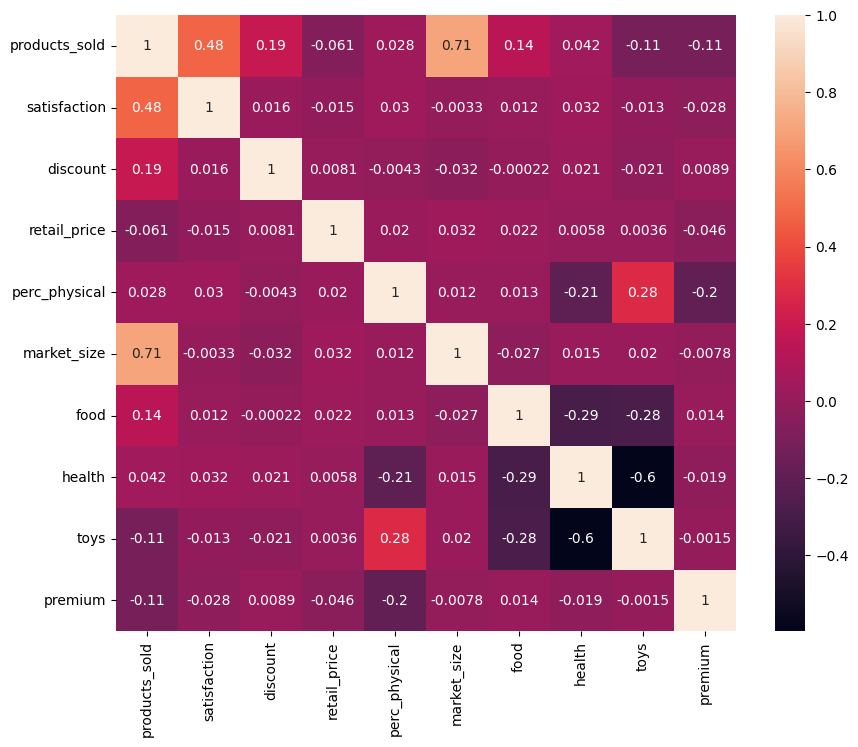

In [78]:
correlations = imputed_data.corr()
print(correlations)

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True)
plt.show()

There can be seen that market_size has a high positive correlation with products_sold but it is not >0.8 so there is no need to remove any variables from our model.

Assignment 3: (20%)

There might non-linear relationships in the data. Investigate if this is the case and if you find any show it with a scatterplot and a lowess-curve (remember: the dependent variable should be on the y-axis). If you found any, make the correct transformation and test whether this improved the model fit.

Visualise relationships using scatterplot and lowess-curve:

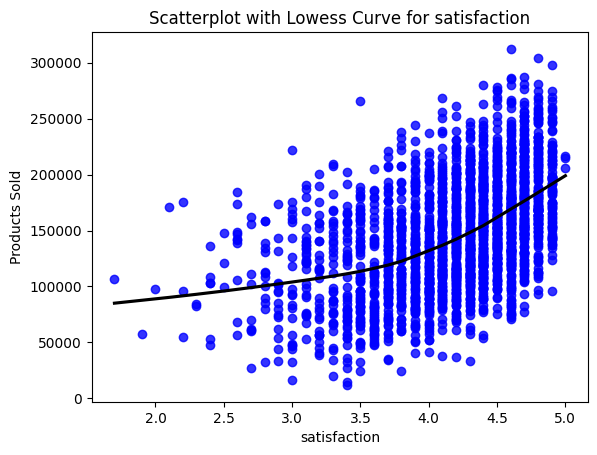

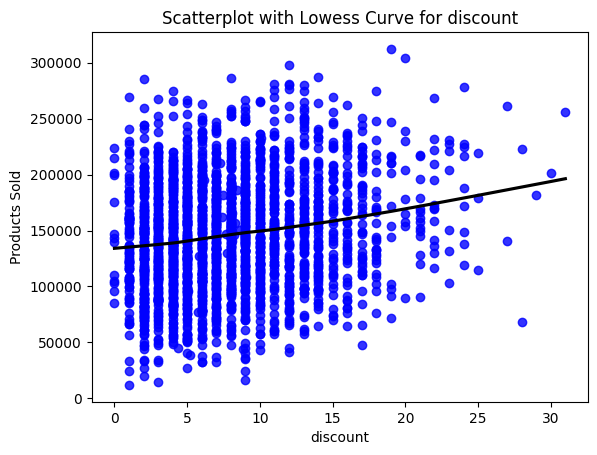

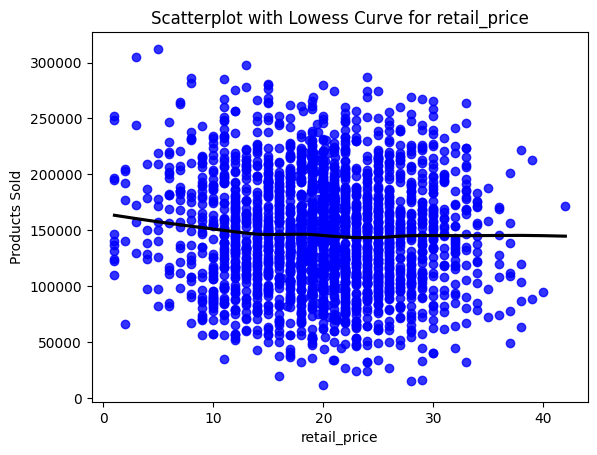

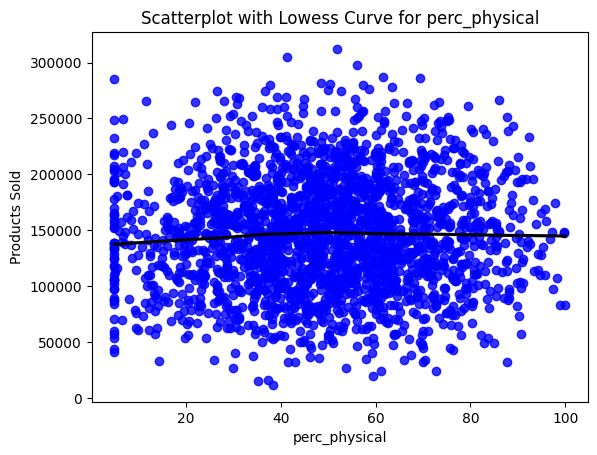

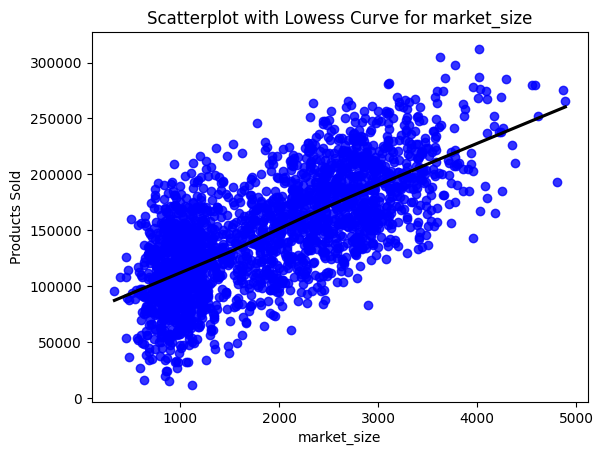

In [79]:
independent_vars = ['satisfaction', 'discount', 'retail_price', 'perc_physical', 'market_size']

for var in independent_vars:
    sns.regplot(x=var, y='products_sold', data=imputed_data,
                scatter_kws={"color": "blue"}, line_kws={"color": "black"}, lowess=True)
    plt.title(f'Scatterplot with Lowess Curve for {var}')
    plt.xlabel(var)
    plt.ylabel('Products Sold')
    plt.show()

The only one which looks like a non-linear relationship is satisfaction.

In [80]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          products_sold   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     1119.
Date:                Thu, 04 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:48:13   Log-Likelihood:                -25648.
No. Observations:                2250   AIC:                         5.132e+04
Df Residuals:                    2240   BIC:                         5.137e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.151e+05   4312.666    -26.695

In [84]:
imputed_data['satisfaction2'] = pow(imputed_data['satisfaction'], 2)

# The model formula should include the new squared term
model3 = smf.ols('products_sold ~ satisfaction + satisfaction2 + health + toys + food + discount + retail_price + perc_physical + market_size + premium', data=imputed_data).fit()

# Print the summary to see how the model performs with the new transformation
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:          products_sold   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     1212.
Date:                Thu, 04 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:48:48   Log-Likelihood:                -25475.
No. Observations:                2250   AIC:                         5.097e+04
Df Residuals:                    2239   BIC:                         5.103e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.994e+05   1.67e+04     11.906

This model has a higher R-squared than the previous model

In [85]:
imputed_data.head()

,products_sold,satisfaction,discount,retail_price,perc_physical,market_size,food,health,toys,premium,satisfaction2
0,67648.0,3.5,12.0,33.000000,42.3,852.0,0.0,1.0,0.0,0.0,12.25
1,120421.0,4.5,10.0,16.000000,54.3,1045.0,0.0,0.0,0.0,0.0,20.25
2,95242.0,2.9,6.0,25.000000,88.2,1461.0,0.0,0.0,1.0,0.0,8.41
3,105632.0,2.6,8.0,18.716905,5.0,1579.0,0.0,1.0,0.0,0.0,6.76
4,221627.0,4.9,11.0,25.000000,57.0,2643.0,0.0,0.0,1.0,0.0,24.01


Assignment 4: (30%)

First, create a model where all independent variables are included and clearly explain what the outcome of each variable in the model means for how many products are sold.